# Contnet <a id='content'></a>

##   1.[EDA](#EDA)
##   2.[DataPreprocessing](#DataPreprocessing)
##   3.[Modeling](#Modeling)<br>



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


# EDA
#### [Back to CONTENT](#content)

In [2]:
# on kaggle
data = pd.read_csv('../input/adult-income-dataset/adult.csv')

# on my PC
# data = pd.read_csv('adult.csv')

pd.set_option("display.max_columns", None)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
def count_values(data):
    for i,v in enumerate(data.columns.to_list()):
        print(v,"\n", data[v].value_counts())
        
# count_values(data)

# DataPreprocessing
#### [Back to CONTENT](#content)

In [7]:
# Replace ? with Null
def replaceWithNull(data):
    for i,v in enumerate(data.columns.to_list()):
        data[v].replace("?",np.NaN, inplace=True)
        
replaceWithNull(data)
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
data["workclass"].replace(np.NaN, "Private", inplace=True)
data["occupation"].replace(np.NaN, "Missing", inplace=True)
data["native-country"].replace(np.NaN, "United-States", inplace=True)

ord_data = data.copy()
ohe_data = data.copy()

data.isnull().sum()



age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# with ordinal encoding

In [9]:
def ordinal_encoding(data) :  
    for j, x in enumerate(data.select_dtypes(exclude=['float64','int64']).columns.to_list()): 
        my_dict = {v:i for i, v in enumerate(data[x].unique(), 0)}

        data.loc[:, x] = data.loc[:, x].map(my_dict)


        
ordinal_encoding(ord_data) 
ord_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,3,10,1,0,1,0,0,7688,0,40,0,1
4,18,0,103497,3,10,0,3,0,1,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,257302,2,12,1,9,4,1,1,0,0,38,0,0
48838,40,0,154374,1,9,1,0,1,1,0,0,0,40,0,1
48839,58,0,151910,1,9,2,7,3,1,1,0,0,40,0,0
48840,22,0,201490,1,9,0,7,0,1,0,0,0,20,0,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'marital-status'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>],
       [<AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'native-country'}>,
        <AxesSubplot:title={'center':'income'}>, <AxesSubplot:>]],
      dtype=object)

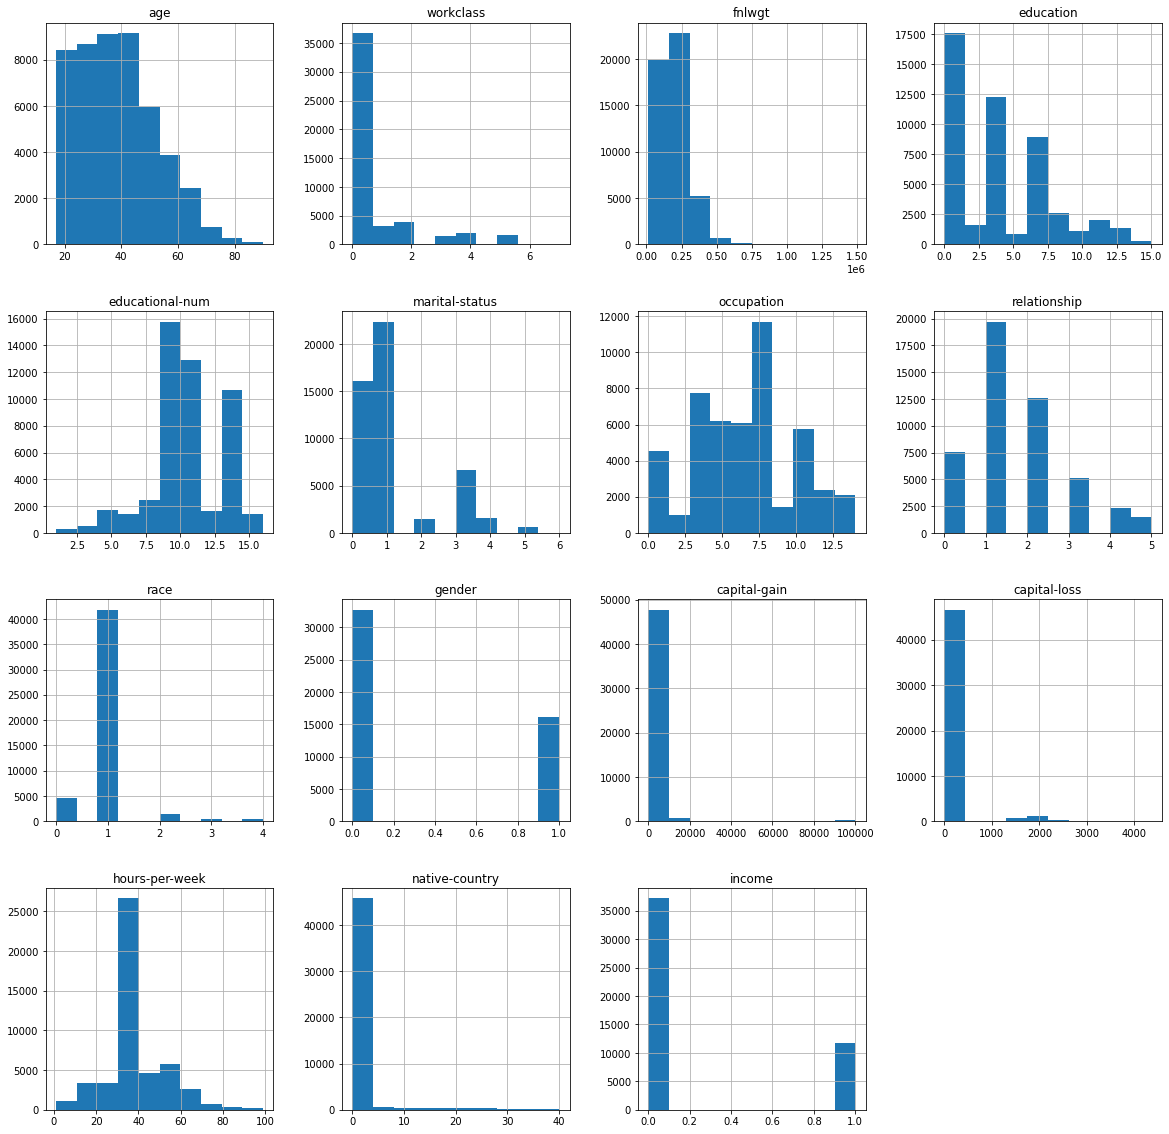

In [10]:
ord_data.hist(figsize = (20,20))

In [11]:
corr_matrix = ord_data.corr()
corr_matrix["income"].sort_values(ascending = False)
#("educational-num", "age", "hours-per-week", "capital-gain", "gender", "education", "capital-loss", "workclass", "occupation", "race", "native-country", "marital-status", "fnlwgt", "relationship")

income             1.000000
educational-num    0.332613
age                0.230369
hours-per-week     0.227687
capital-gain       0.223013
education          0.160178
capital-loss       0.147554
workclass          0.144122
occupation         0.065845
race               0.032272
native-country    -0.001235
marital-status    -0.003602
fnlwgt            -0.006339
relationship      -0.060166
gender            -0.214628
Name: income, dtype: float64

In [12]:
X = ord_data.drop(['income'],axis=1)
y = ord_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Modeling
#### [Back to CONTENT](#content)

In [13]:
# Fit model
DT_1 = DecisionTreeClassifier(max_depth = 3)

DT_1.fit(X_train, y_train)

yp_1 = DT_1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, f1_score

print('My accuracy: ', accuracy_score(y_test, yp_1)*100, '%')


My accuracy:  82.18112331945676 %


In [15]:
print(classification_report(y_test, yp_1))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     11138
           1       0.66      0.54      0.59      3515

    accuracy                           0.82     14653
   macro avg       0.76      0.73      0.74     14653
weighted avg       0.81      0.82      0.82     14653



# One Hot Encoding

In [16]:

ohe_data = pd.get_dummies(ohe_data, drop_first=True)

ohe_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Missing,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48838,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0

In [17]:
X = ohe_data.iloc[:, :-1].values
y = ohe_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Modeling

In [18]:
# Fit model
DT_2 = DecisionTreeClassifier(max_depth=9)

DT_2.fit(X_train, y_train)

yp_2 = DT_2.predict(X_test)

print('My accuracy: ', DT_2.score(X_test, y_test)*100, '%')
print('My accuracy: ', accuracy_score(y_test, yp_2)*100, '%')

My accuracy:  85.88002456834778 %
My accuracy:  85.88002456834778 %


In [19]:
print(classification_report(y_test, yp_2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11122
           1       0.78      0.58      0.66      3531

    accuracy                           0.86     14653
   macro avg       0.83      0.76      0.79     14653
weighted avg       0.85      0.86      0.85     14653



# ordinal encoding: 82%, One Hot Encoding: 86%